**Q1**

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/people.csv')

In [3]:
df.head()

,Age,Age Group,Height,Status,Years Married
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [4]:
def check_age_range(f) :
        age_range = lambda r : r in range(151)
        print(df["Age"].apply(age_range))
        
check_age_range(df)

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool


In [15]:
def check_status(f) :
        status=set(df.Status)
        status_check = lambda r : r in status
        print(df["Status"].apply(status_check))
    
check_status(df)

0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: bool


In [18]:
def check_age(f) :
        age_check = lambda r : r[0] > r[1]
        print(df[["Age","Years Married"]].apply(age_check,axis=1))
    
check_age(df)

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [19]:
def check_group(f) :
        def group_check(x) :
            if (x[0] in range(18) and x[1]=="child") or (x[0] in range(18,66) and x[1]=="adult") or (x[0]>65 and x[1]=="elderly")  :
                return True
            else :
                return False
        print(df[["Age","Age Group"]].apply(group_check,axis=1))
    
check_group(df)

0     True
1     True
2     True
3     True
4    False
dtype: bool


In [20]:
df.describe()

,Age,Height,Years Married
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


0     True
1     True
2    False
3     True
4     True
dtype: bool


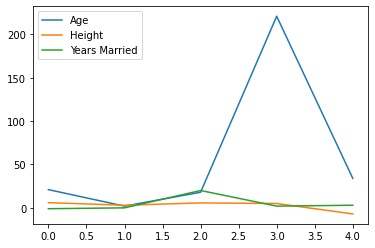

In [22]:
x = df.plot()
    
E = {"check_age_range" : check_age_range, "check_age" : check_age, "check_status": check_status, "check_group" : check_group}
        
E["check_age"](df)

Program 2: Perform the following preprocessing tasks on the dirty_iris dataset.
i) Calculate the number and percentage of observations that are complete.
ii) Replace all the special values in data with NA.
iii) Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object.
  – Species should be one of the following values: setosa, versicolor or virginica.
  – All measured numerical properties of an iris should be positive.
  – The petal length of an iris is atleast 2 times its petal width.
  – The sepal length of an iris cannot exceed 30cm.
  – The sepals of an iris are longer than its petals.
iv) Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.
v) Find outliers in sepal length using boxplot and boxplot.stats** 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
f = pd.read_csv("/content/Iris (1).csv")
    
f
    
f.isnull()
    
f.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
f.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [26]:
number_complete = len(f.dropna())
    
number_complete

150

In [27]:
complete_percent = len(f.dropna())/len(f)
    
complete_percent

1.0

In [29]:
f.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
f.fillna(value="NA",inplace=True)

In [31]:
def species_check(f) :
        species = set(["setosa","versicolor","virginica"])
        func = lambda r : r in species
        x = np.array([func(xi) for xi in f["Species"]])
        if (False in x) :
            print("Violation : Invalid species name")
            print(str(len(x) - np.sum(x)) + " violations")
        else :
            print("No Violation")
        return (len(x) - np.sum(x))
    
species_check(f)

Violation : Invalid species name
150 violations


150

In [32]:
temp = pd.read_csv("/content/Iris (1).csv")
    
temp.dropna(inplace = True)
    
temp

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
def all_positive(f) :
        func = lambda r : r>0
        a = np.array([func(f[xi]) for xi in f.columns[:-1]])
        a = a.reshape(a.shape[0]*a.shape[1])
        if (False in a) :
            print("Violation : Non-positive values present")
            print(str(len(a) - np.sum(a)) + " violations")
        else :
            print("No Violation")
        return (len(a) - np.sum(a))
    
all_positive(temp)
    

No Violation


0

In [35]:
 temp["PetalLengthCm"]>(2*temp["PetalWidthCm"])

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [37]:
def check_petal(f) :
        a = np.array(f["PetalLengthCm"]>(2*f["PetalWidthCm"]))
        if (False in a) :
            print("Violation : Petal Length is less than twice of Petal Width in some places")
            print(str(len(a) - np.sum(a)) + " violations")
        else :
            print("No Violation")
        return (len(a) - np.sum(a))
            
check_petal(temp)

No Violation


0

In [39]:
def sepal_check(f) :
        a = np.array(f["SepalLengthCm"]<=30)
        if (False in a) :
            print("Violation : Sepal Length is greater than 30 cm in some places")
            print(str(len(a) - np.sum(a)) + " violations")
        else :
            print("No Violation")
        return (len(a) - np.sum(a))
    
sepal_check(temp)

No Violation


0

In [41]:
def sepal_petal_check(f) :
        a = np.array(f["SepalLengthCm"]>f["PetalLengthCm"])
        if (False in a) :
            print("Violation : Sepal length is greater than petal length in some places")
            print(str(len(a) - np.sum(a)) + " violations")
        else :
            print("No Violation")
        return (len(a) - np.sum(a))
    
sepal_petal_check(temp)

No Violation


0

Violation : Invalid species name
150 violations
No Violation
No Violation
No Violation
No Violation


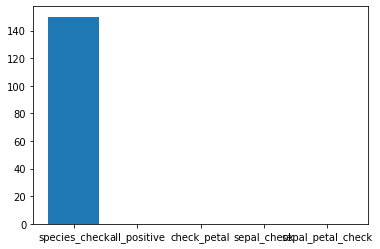

In [45]:
rules = {"species_check" : species_check, "all_positive" : all_positive, "check_petal" : check_petal, "sepal_check" : sepal_check, "sepal_petal_check" : sepal_petal_check}
    
x = []
for i in rules.keys() :
     x.append(rules[i](temp))
    
f.loc[0,:]
    
plt.bar(rules.keys(),x)
plt.show()

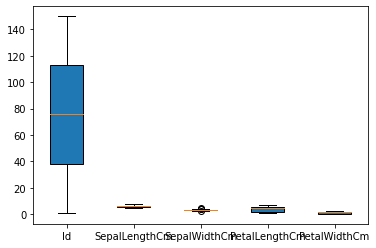

In [46]:
f.describe()
    
temp.describe()
    
z = []
for i in range(len(temp.columns)-1) :
     z.append(temp[temp.columns[i]])
    
plt.boxplot(z,labels=temp.columns[:-1],patch_artist=True)
plt.show()
    

**Program 3 : Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset.**

In [47]:
import numpy as np
import sklearn as skl
import pandas as pd
from sklearn import preprocessing


In [48]:
file=pd.read_csv('wine.csv')
file

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [51]:
data=file.values
print('wine',data[:,1].mean())
print('wine',data[:,1].std())
print('Alcohol',data[:,2].mean())
print('Alcohol',data[:,2].std())
print('malic acid',data[:,3].mean())
print('malic acid',data[:,3].std())
print('ash',data[:,4].mean())
print('ash',data[:,4].std())
print('acl',data[:,5].mean())
print('acl',data[:,5].std())
print('mg',data[:,6].mean())
print('mg',data[:,6].std())
print('phenol',data[:,7].mean())
print('phenol',data[:,7].std())
print('flavanoid',data[:,8].mean())
print('flavanoid',data[:,8].std())
print('nonfla. phenol',data[:,9].mean())
print('nonfla. phenol',data[:,9].std())
print('proanth',data[:,10].mean())
print('proanth',data[:,10].std())
print('color.int',data[:,11].mean())
print('color.int',data[:,11].std())
print('hue',data[:,12].mean())
print('hue',data[:,12].std())
print('OD',data[:,13].mean())
print('OD',data[:,13].std())
print('proline',data[:,-1].mean())
print('proline',data[:,-1].std())

wine 13.00061797752809
wine 0.8095429145285168
Alcohol 2.3363483146067416
Alcohol 1.1140036269797893
malic acid 2.3665168539325845
malic acid 0.27357229442643255
ash 19.49494382022472
ash 3.3301697576582128
acl 99.74157303370787
acl 14.242307673359806
mg 2.295112359550562
mg 0.6240905641965369
phenol 2.0292696629213487
phenol 0.996048950379233
flavanoid 0.3618539325842696
flavanoid 0.12410325988364795
nonfla. phenol 1.5908988764044945
nonfla. phenol 0.5707488486199379
proanth 5.058089882022472
proanth 2.3117646609525573
color.int 0.9574494382022471
color.int 0.22792860656507252
hue 2.6116853932584267
hue 0.7079932646716005
OD 746.8932584269663
OD 314.0216568419878
proline 746.8932584269663
proline 314.0216568419878


In [52]:
a=data[:,1]
b=data[:,2]
c=data[:,3]
d=data[:,4]
e=data[:,5]
f=data[:,6]
g=data[:,7]
h=data[:,8]
i=data[:,9]
j=data[:,10]
k=data[:,11]
l=data[:,12]
m=data[:,13]
n=data[:,-1]


In [53]:
    scaled_a=preprocessing.scale(a)
    scaled_b=preprocessing.scale(b)
    scaled_c=preprocessing.scale(c)
    scaled_d=preprocessing.scale(d)
    scaled_e=preprocessing.scale(e)
    scaled_f=preprocessing.scale(f)
    scaled_g=preprocessing.scale(g)
    scaled_h=preprocessing.scale(h)
    scaled_i=preprocessing.scale(i)
    scaled_j=preprocessing.scale(j)
    scaled_k=preprocessing.scale(k)
    scaled_l=preprocessing.scale(l)
    scaled_m=preprocessing.scale(m)
    scaled_n=preprocessing.scale(n)


In [54]:
    print('Standardized wine Mean',int(scaled_a.mean()))
    print('Standardized wine Standard Deviation',scaled_a.std())
    print('Standardized proline Mean',int(scaled_b.mean()))
    print('Standardized proline Standard Deviation',scaled_b.std())
    print('Standardized malic acid Mean',int(scaled_c.mean()))
    print('Standardized malic acid Standard Deviation',scaled_c.std())
    print('Standardized ash Mean',int(scaled_d.mean()))
    print('Standardized ash Standard Deviation',scaled_d.std())
    print('Standardized acl Mean',int(scaled_e.mean()))
    print('Standardized acl Standard Deviation',scaled_e.std())
    print('Standardized mg Mean',int(scaled_f.mean()))
    print('Standardized mg Standard Deviation',scaled_f.std())
    print('Standardized phenol Mean',int(scaled_g.mean()))
    print('Standardized phenol Standard Deviation',scaled_g.std())
    print('Standardized flavanoid Mean',int(scaled_h.mean()))
    print('Standardized flavanoid Standard Deviation',scaled_h.std())
    print('Standardized nonfla. phenol Mean',int(scaled_i.mean()))
    print('Standardized nonfla. phenol Standard Deviation',scaled_i.std())
    print('Standardized proanth Mean',int(scaled_j.mean()))
    print('Standardized proanth Standard Deviation',scaled_j.std())
    print('Standardized color.int Mean',int(scaled_k.mean()))
    print('Standardized color.int Standard Deviation',scaled_k.std())
    print('Standardized hue Mean',int(scaled_l.mean()))
    print('Standardized hue Standard Deviation',scaled_l.std())
    print('Standardized OD Mean',int(scaled_m.mean()))
    print('Standardized OD Standard Deviation',scaled_m.std())
    print('Standardized proline Mean',int(scaled_n.mean()))
    print('Standardized proline Standard Deviation',scaled_n.std())

Standardized wine Mean 0
Standardized wine Standard Deviation 1.0
Standardized proline Mean 0
Standardized proline Standard Deviation 1.0
Standardized malic acid Mean 0
Standardized malic acid Standard Deviation 1.0
Standardized ash Mean 0
Standardized ash Standard Deviation 1.0
Standardized acl Mean 0
Standardized acl Standard Deviation 1.0
Standardized mg Mean 0
Standardized mg Standard Deviation 0.9999999999999999
Standardized phenol Mean 0
Standardized phenol Standard Deviation 1.0
Standardized flavanoid Mean 0
Standardized flavanoid Standard Deviation 1.0
Standardized nonfla. phenol Mean 0
Standardized nonfla. phenol Standard Deviation 0.9999999999999998
Standardized proanth Mean 0
Standardized proanth Standard Deviation 1.0
Standardized color.int Mean 0
Standardized color.int Standard Deviation 1.0
Standardized hue Mean 0
Standardized hue Standard Deviation 1.0
Standardized OD Mean 0
Standardized OD Standard Deviation 1.0
Standardized proline Mean 0
Standardized proline Standard 

**Program 4: Run Apriori algorithm to find frequent itemsets and association rules
 4.1 Use minimum support as 50% and minimum confidence as 75%
 4.2 Use minimum support as 60% and minimum confidence as 60%**

In [55]:
    import pandas as pd
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori

In [56]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
               ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
               ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
               ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
               ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [58]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [59]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [60]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [61]:
    frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
    frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [62]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
5,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0
9,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


**Program 5: Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set in to training and test set. Compare the accuracy of the different classifiers under the following situations:
 5.1 a) Training set = 75% Test set = 25%
 5.1 b) Training set = 66.6% (2/3rd of total), Test set = 33.3%
 5.2 Training set is chosen by i)hold out method ii)Random subsampling iii)Cross-Validation. Compare the accuracy of the classifiers obtained.
 5.3 Data is scaled to standard format.**



In [63]:
    import pandas as pd
    import numpy as np

In [64]:
    ds=pd.read_csv('/content/Iris (1).csv')
    ds.shape

(150, 6)

In [66]:
x=ds.values[:,:-1]
y=ds.values[:,-1]
print(x.shape)
print(y.shape)

(150, 5)
(150,)


In [68]:
from sklearn.model_selection import train_test_split
        
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
    DTclassifer = DecisionTreeClassifier()
    
    DTclassifer.fit(X_train,Y_train)

DecisionTreeClassifier()

In [72]:
predictions=DTclassifer.predict(X_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [73]:
accuracy_score(Y_test,predictions)

1.0

In [74]:
   confusion_matrix(Y_test,predictions)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 14]])

In [133]:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    import pandas as pd

In [130]:
from sklearn.datasets import load_iris


In [142]:
iris = load_iris()

In [143]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [146]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)

In [149]:
df["target"] = iris.target

In [153]:

x=df.drop(["target"], axis=1)
y=df.target ##class label 
##print(x)
print(y)
    

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [154]:
    Val_size=0.33 #test size is how much rest is training
    random_seed=3 #randomly chosing
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size = Val_size,random_state=random_seed)
    deciTree = DecisionTreeClassifier()
    deciTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [155]:
    predictions = deciTree.predict(X_test)
    print("Accuracy on the Test Data ")
    print(accuracy_score(Y_test, predictions))

Accuracy on the Test Data 
0.92


In [157]:
    scaler=MinMaxScaler()
    print(scaler.fit(df))

MinMaxScaler()


**K_fold Cross Validation**

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfol_val = KFold(5)

In [161]:
results = cross_val_score(deciTree,x,y,cv=kfol_val)
results

array([1.        , 0.96666667, 0.83333333, 0.93333333, 0.8       ])

In [164]:
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,Y_train) 
 

KNeighborsClassifier(n_neighbors=3)

In [168]:
Y_pred = neigh.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 1])

In [170]:
  print(accuracy_score(Y_test, Y_pred))

0.94


**Program 6: Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.**


In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pandas as pd

In [174]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [177]:
    sep_l = df.values[:,0]
    pet_l = df.values[:,2]

In [178]:
pet_l

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

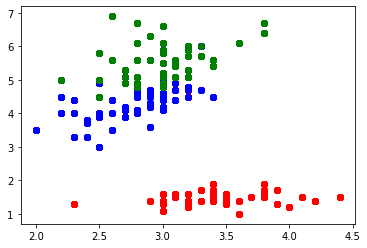

In [188]:
 # Taking Sepal Width and Petal Length as our two features for clustering
    # (for 2d visualization)
        
 # Taking Sepal Width and Petal Length as our two features for clustering
    # (for 2d visualization)
        
for i in range(150):
    if i<=49:
        plt.plot(df.values[i:,1],df.values[i:,2],'ro')
    if i>49 and i<=99:
        plt.plot(df.values[i:,1],df.values[i:,2],'bo')
    if i>99:
        plt.plot(df.values[i:,1],df.values[i:,2],'go')        
plt.show()              

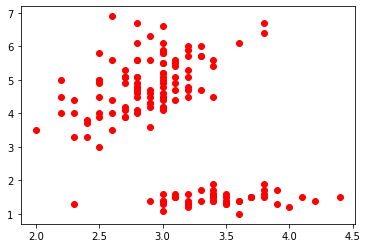

In [191]:
# ## Plotting unlabelized iris data set
    
plt.plot(df.values[:,1],df.values[:,2],'ro')
plt.show()

In [192]:
# # Clustering using KMeans Clustering Algorithm
    
estimator1 = KMeans(n_clusters=3)
    
estimator1.fit(df.values[:,1:3])
        

KMeans(n_clusters=3)

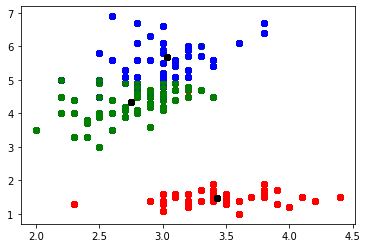

In [193]:
# ## Plotting Clustered data points using K_Means with 3 clusters
    
for i in range(150):
    if estimator1.labels_[i]==0:
        plt.plot(df.values[i:,1],df.values[i:,2],'go')
        plt.plot(estimator1.cluster_centers_[:,0],estimator1.cluster_centers_[:,1],'o',c='black')
    elif estimator1.labels_[i]==1:
        plt.plot(df.values[i:,1],df.values[i:,2],'ro')
        plt.plot(estimator1.cluster_centers_[:,0],estimator1.cluster_centers_[:,1],'o',c='black')
    elif estimator1.labels_[i]==2:
        plt.plot(df.values[i:,1],df.values[i:,2],'bo')
        plt.plot(estimator1.cluster_centers_[:,0],estimator1.cluster_centers_[:,1],'o',c='black')
plt.show()        

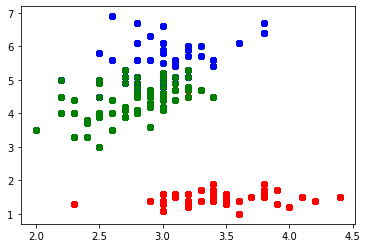

In [195]:
# # Clustering using Hierarchical Clustering Algorithm
    
estimator2 = AgglomerativeClustering(n_clusters=3)
        
estimator2.fit(df.values[:,1:3])
    
for i in range(150):
    if estimator2.labels_[i]==0:
        plt.plot(df.values[i:,1],df.values[i:,2],'go')
    elif estimator2.labels_[i]==1:
        plt.plot(df.values[i:,1],df.values[i:,2],'ro')
    elif estimator2.labels_[i]==2:
        plt.plot(df.values[i:,1],df.values[i:,2],'bo')
plt.show()        

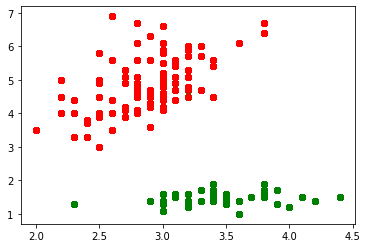

In [197]:
# # Clustering using DBSCAN Clustering Algorithm
    
estimator3 = DBSCAN()
    
estimator3.fit(df.values[:,1:3])
    
for i in range(150):
    if estimator3.labels_[i]==0:
        plt.plot(df.values[i:,1],df.values[i:,2],'go')
    elif estimator3.labels_[i]==1:
        plt.plot(df.values[i:,1],df.values[i:,2],'ro')
    elif estimator3.labels_[i]==2:
        plt.plot(df.values[i:,1],iris.values[i:,2],'bo')
plt.show()        
        